### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from datetime import datetime as dt
from pandas.plotting import lag_plot

# from mpl_finance import candlestick_ohlc

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

plt.style.use('fivethirtyeight')

Importing plotly failed. Interactive plots will not work.


### Creating Functions

Creating several needed functions for the study : 
- get_stock_rates in order import stock exchange rates for a given company
- plotting functions to create linear plot of the stock price evolution 
- stock prediction functions

In [4]:
# def get_stock_rates(company_name):
#     """get the stock exchange rate for the given company from Yahoo! Finance for the studied period  
#     i.e. from 2010-01-01 to 2020-03-08
    
#     Input : the official company name, as quoted on the Stock Exchange 
#     Output : DataFrame of the given company's stock exchange price evolution with finance KPIs : 
#             Highest price, Lowest price, Opening Price, Closing Price, Volume of stocks 
#             + new column 'avg_price' i.e. average of the Highest & Lowest price of the day"""
    
#     df = web.DataReader(f'{company_name}', data_source='yahoo', start='2010-01-01', end='2020-03-08')
#     df['avg_price'] = df[['High','Low']].mean(axis=1)
#     df.to_csv(f'{company_name}_stocks_rate_2010-01-01_to_2020-03-08.csv')
#     df.head()
    
#     return df

## Importing Tesla daily stock exchange values from 2010 IPO onwards

In [17]:
df_TSLA = pd.read_csv('../DataSets/Stocks_raw_data/TSLA_stocks_rate_2010-01-01_to_2020-03-08.csv')

In [18]:
df_TSLA

,Date,High,Low,Open,Close,Volume,Adj Close,avg_price
0,2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000
1,2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000
2,2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000
3,2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000
4,2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000
5,2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999
6,2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000
7,2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999
8,2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000
9,2010-07-13,18.639999,16.900000,17.389999,18.139999,2680100.0,18.139999,17.770000


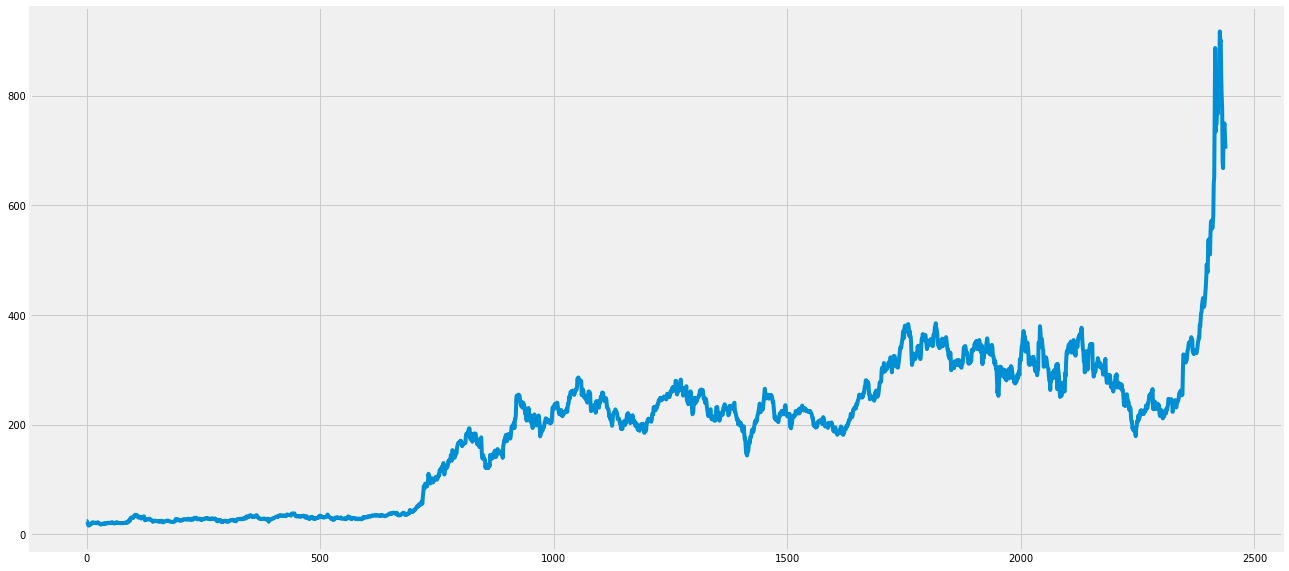

In [7]:
plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_TSLA['Adj Close'])

### Measuring Tesla stock volatility from 2010 onwards

# Rolling Tesla Values

Creating Rolling values over several classical financal timeframe analysis :
- 7-day rolling
- 50-day rolling
- 100-day rolling
- 200-day rolling

In [16]:
df_TSLA['7D_roll'] = df_TSLA['Adj Close'].rolling(7).mean()

df_TSLA['50D_roll'] = df_TSLA['Adj Close'].rolling(50).mean()

df_TSLA['100D_roll'] = df_TSLA['Adj Close'].rolling(100).mean()

df_TSLA['200D_roll'] = df_TSLA['Adj Close'].rolling(200).mean()

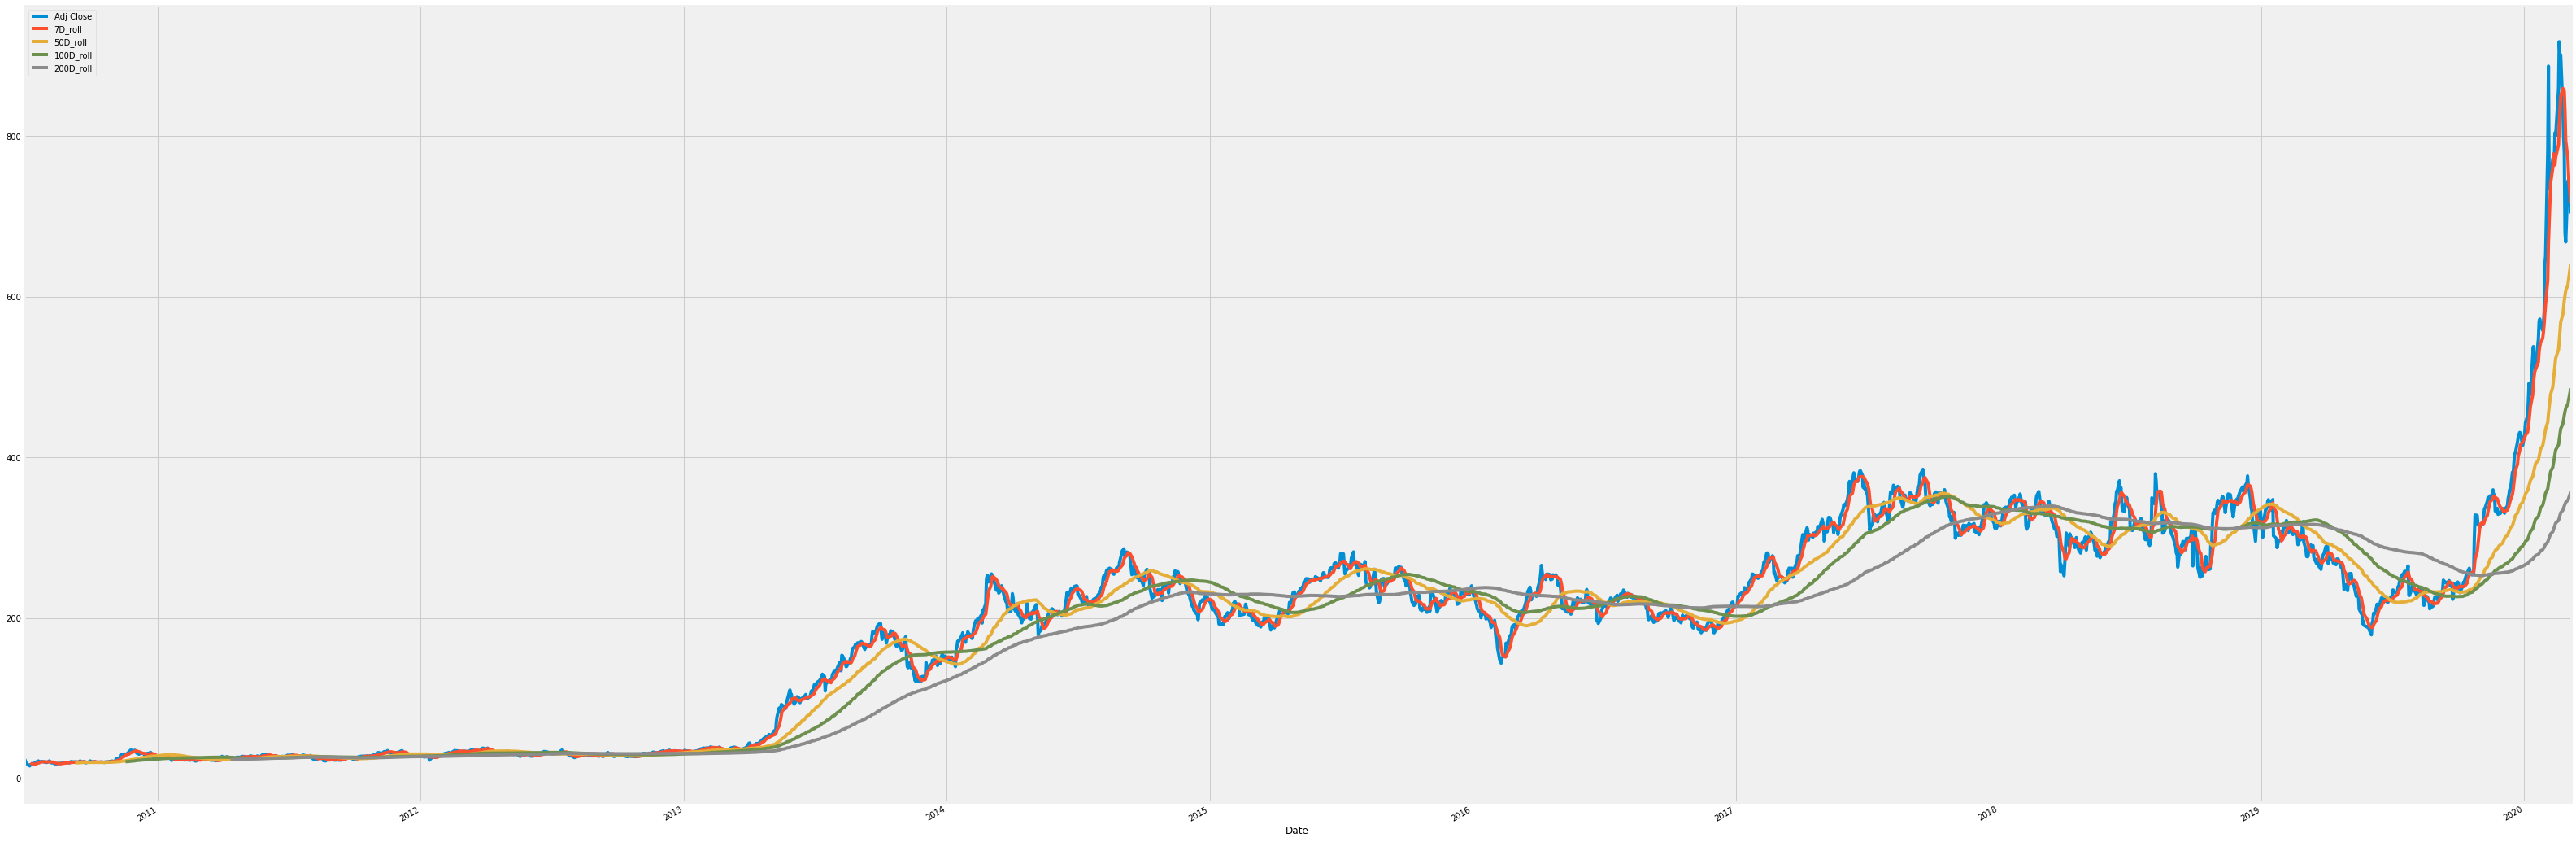

In [17]:
df_TSLA[['Adj Close', '7D_roll', '50D_roll', '100D_roll', '200D_roll']].plot(figsize=(50,20))

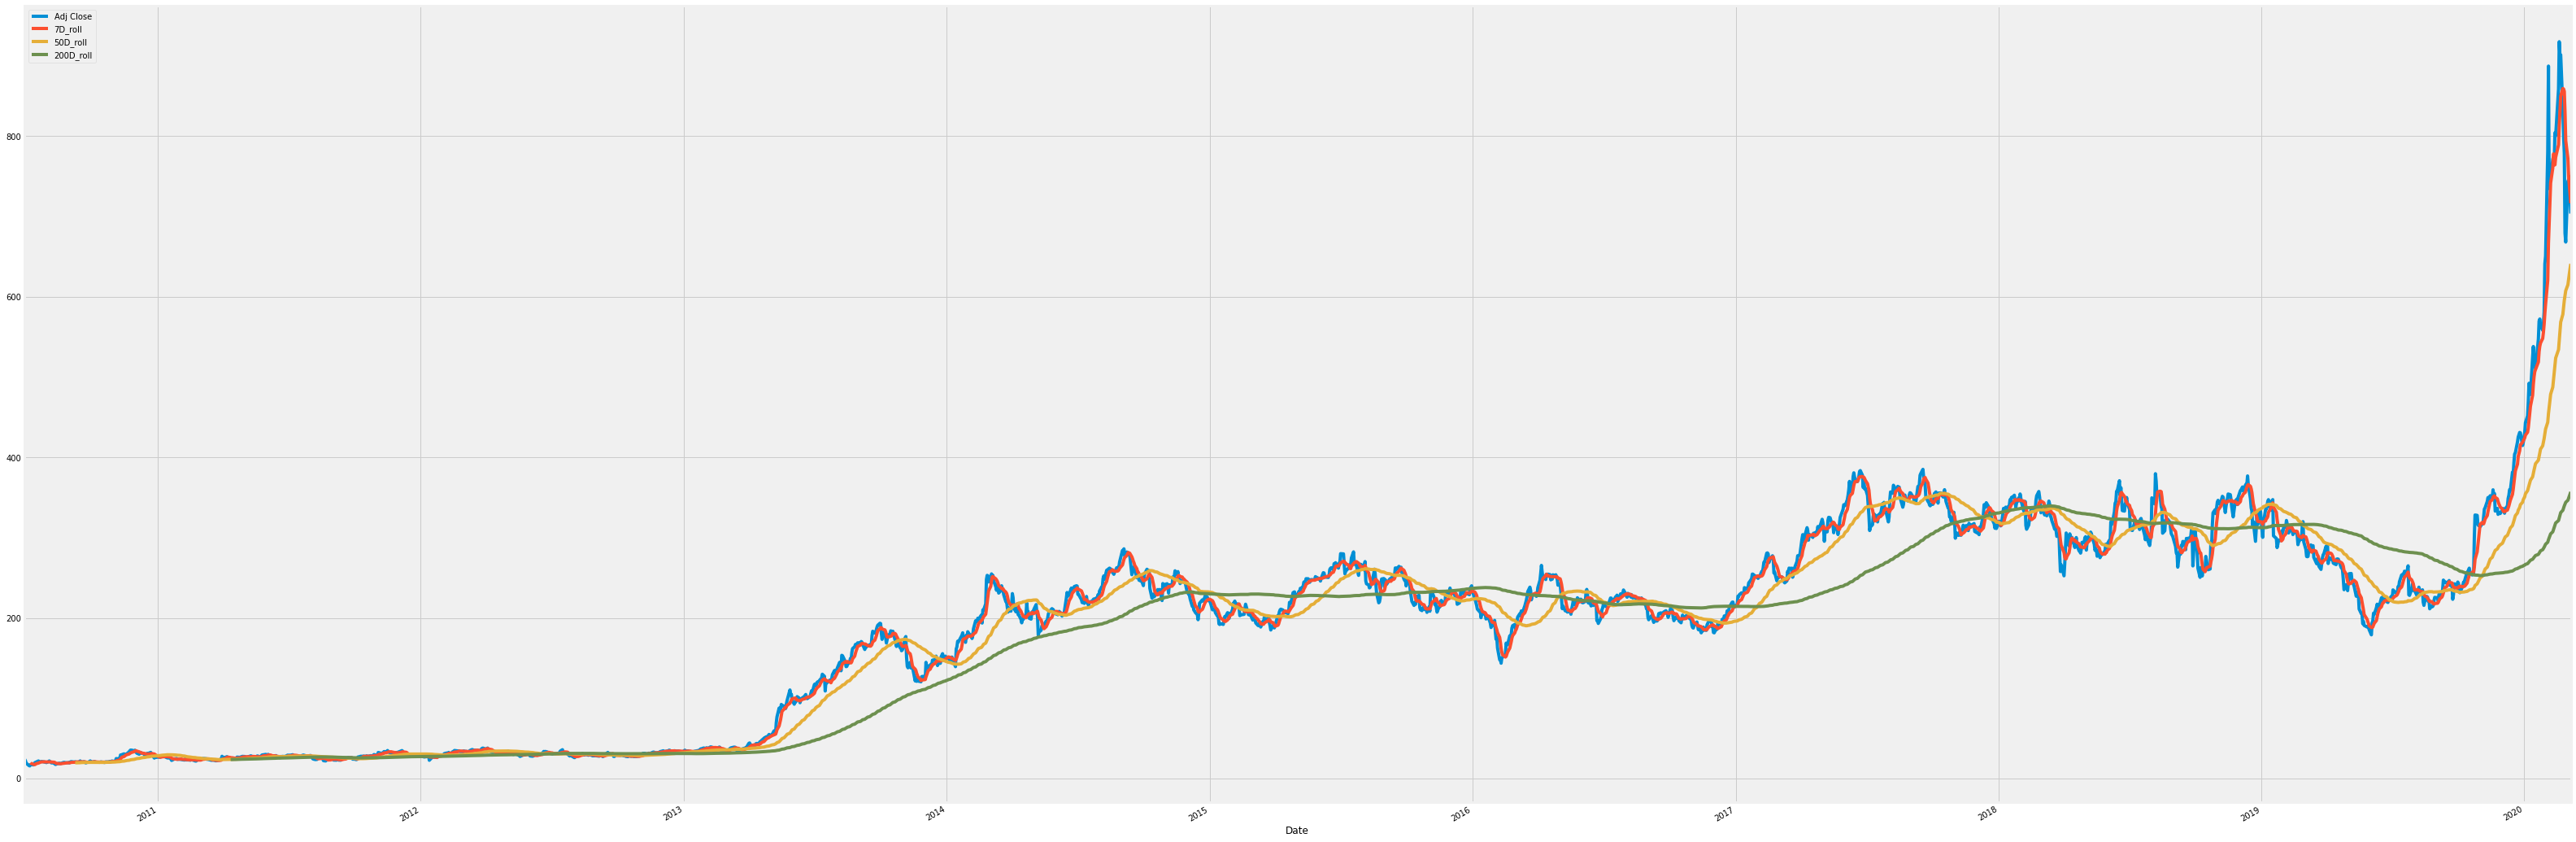

In [18]:
df_TSLA[['Adj Close', '7D_roll', '50D_roll', '200D_roll']].plot(figsize=(50,20))

The higher the roll, the less the trend is influenced by daily volatility and the overall trend can be drawn

# Test Prophet

V1 TEST

In [20]:
df_TSLA.set_index('Date', inplace=True)

In [65]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price
Date,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000


In [11]:
proph = Prophet()

In [23]:
df_TSLA_pred =  df_TSLA['Adj Close'].reset_index()

In [24]:
df_TSLA_pred

,Date,Adj Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
5,2010-07-07,15.800000
6,2010-07-08,17.459999
7,2010-07-09,17.400000
8,2010-07-12,17.049999
9,2010-07-13,18.139999


In [25]:
df_TSLA_pred.columns = ['ds', 'y']

In [26]:
df_TSLA_pred

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
5,2010-07-07,15.800000
6,2010-07-08,17.459999
7,2010-07-09,17.400000
8,2010-07-12,17.049999
9,2010-07-13,18.139999


In [66]:
proph.fit(df_TSLA_pred)

Exception: Prophet object can only be fit once. Instantiate a new object.

In [74]:
future_data  = proph.make_future_dataframe(periods=365*2, freq = 'd')

In [75]:
forecast = proph.predict(future_data)

In [76]:
# forecast

In [77]:
tsla_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

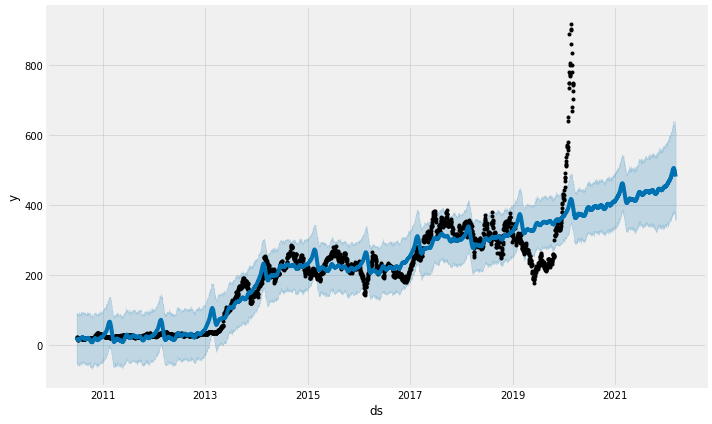

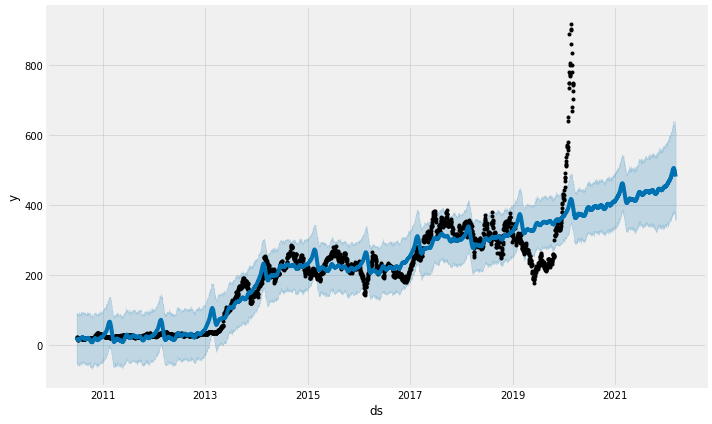

In [78]:
proph.plot(tsla_forecast)

#### Test Prophet 2

In [28]:
df_TSLA_pred =  df_TSLA['Adj Close'].reset_index()

###### Splitting dataframe into a train set (up to March 2018) & a test set (from March 2018 onwards)

In [333]:
df_TSLA_train_2018, df_TSLA_test_2018 = df_TSLA_pred[0:int(len(df_TSLA_pred)*0.75)], df_TSLA_pred[int(len(df_TSLA_pred)*0.25):]

In [334]:
df_TSLA_train_2018.columns = ['ds', 'y']

In [335]:
df_TSLA_test_2018.columns = ['ds', 'y']

In [414]:
proph_2018 = Prophet(interval_width=0.95)

In [415]:
proph_2018.fit(df_TSLA_train_2018)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [422]:
future_data_2018  = proph_2018.make_future_dataframe(periods=366*2, freq = 'd')

In [423]:
forecast_2018 = proph_2018.predict(future_data_2018)

In [424]:
tsla_forecast_2018 = forecast_2018[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

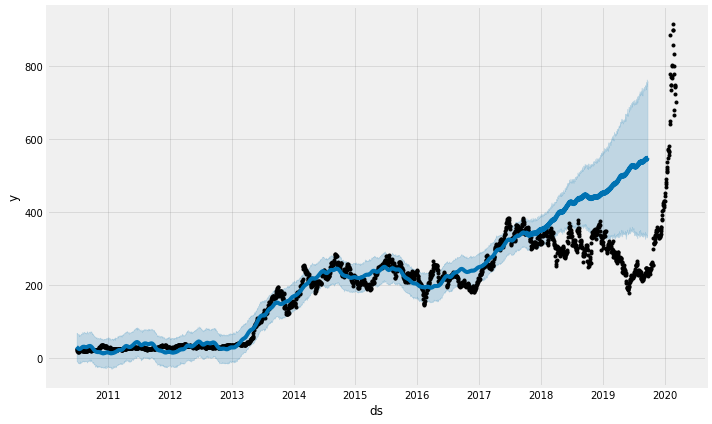

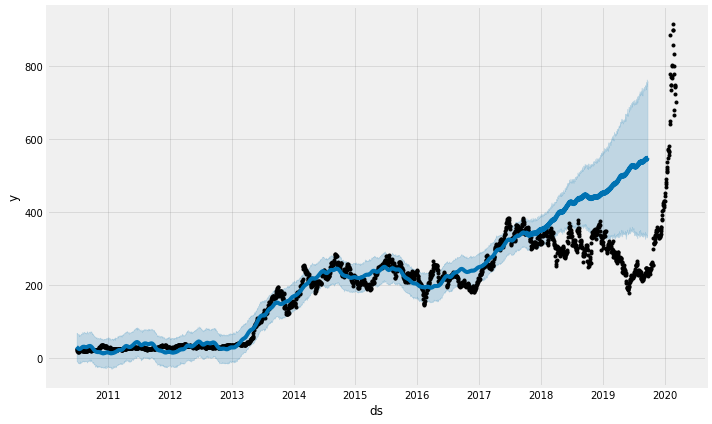

In [425]:
proph.plot(tsla_forecast_2018)

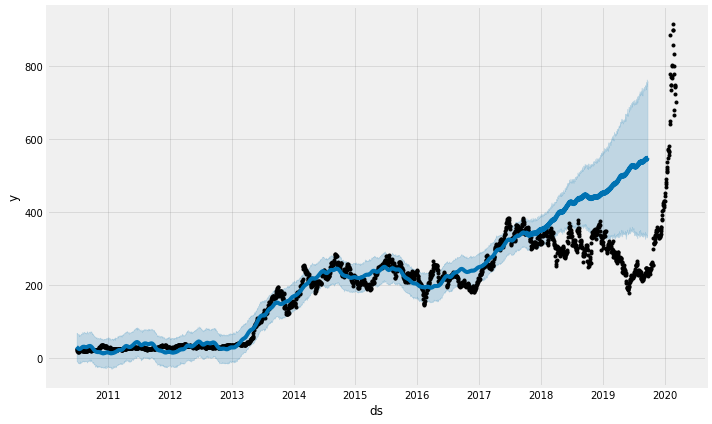

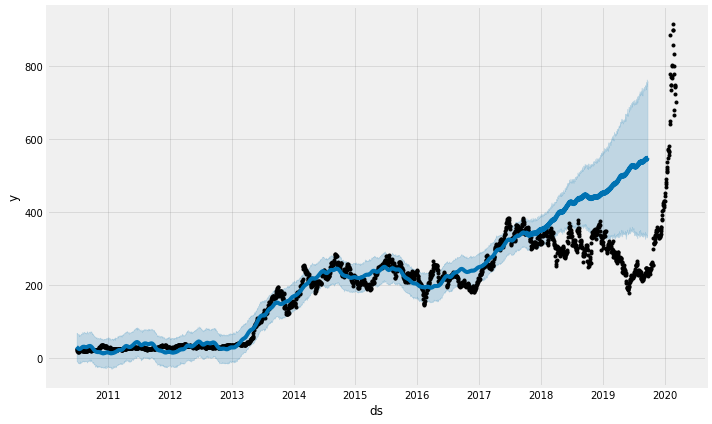

In [426]:
proph.plot(forecast_2018)

[[<matplotlib.lines.Line2D at 0x2a20a4a0e80>],

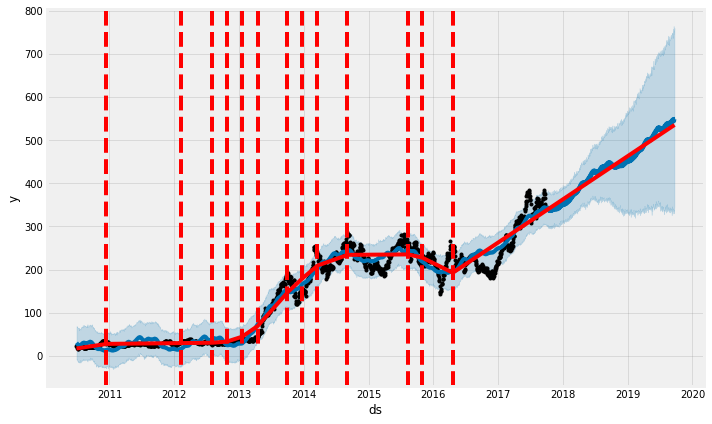

In [427]:
fig_2018 = proph_2018.plot(forecast_2018)
add_changepoints_to_plot(fig_2018.gca(), proph_2018, forecast_2018)

### Testing Seasonal Decomposition

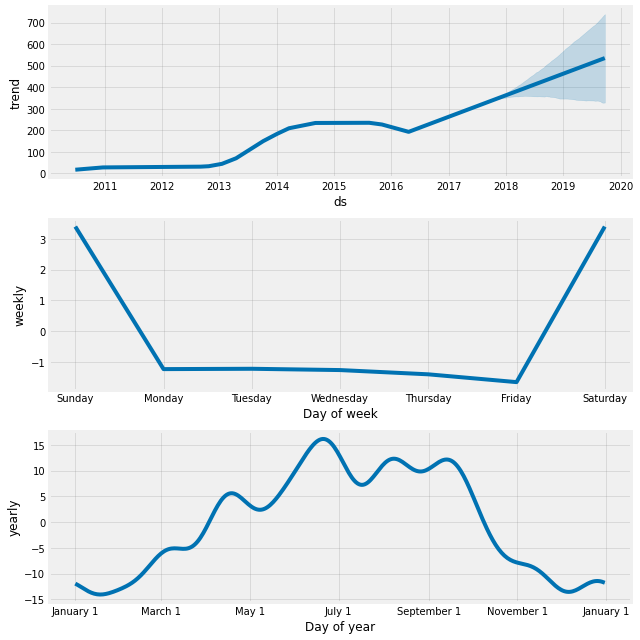

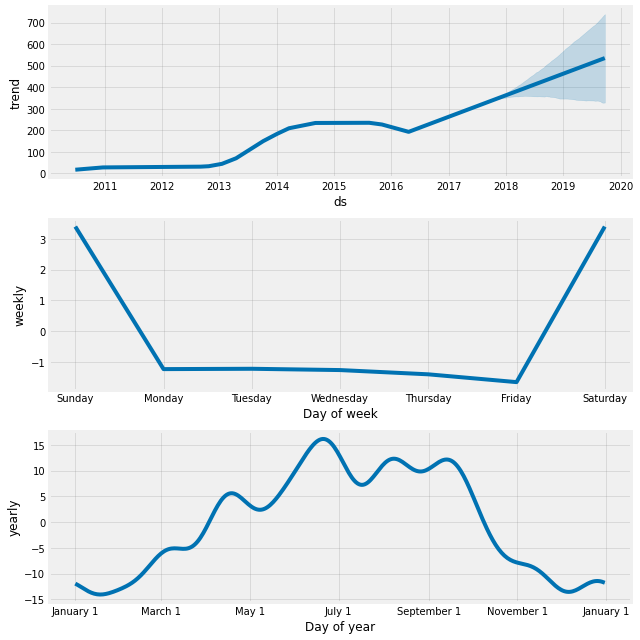

In [428]:
proph_2018.plot_components(forecast_2018)

# MinMaxScaler()

In [52]:
df_TSLA_adj_close_dateless = df_TSLA['Adj Close'].reset_index(drop=False)

In [53]:
df_TSLA_adj_close_dateless

,Date,Adj Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
5,2010-07-07,15.800000
6,2010-07-08,17.459999
7,2010-07-09,17.400000
8,2010-07-12,17.049999
9,2010-07-13,18.139999


In [54]:
# df_TSLA_dateless.reset_index(drop=True, inplace=True)

In [55]:
MinMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [56]:
#feeding the original DF Tesla with 
df_TSLA['y'] = MinMaxScaler.fit_transform(df_TSLA_adj_close_dateless)

ValueError: could not convert string to float: '2010-06-29'

In [57]:
df_TSLA_prophet = df_TSLA['y'].reset_index(drop=False)

KeyError: 'y'

In [58]:
df_TSLA_prophet

NameError: name 'df_TSLA_prophet' is not defined

In [59]:
# #creating a Prophet value
df_TSLA_adj_close_dateless.columns = ['ds','y']

In [60]:
# df_TSLA_train_2018_minmax, df_TSLA_test_2018_minmax = df_TSLA_adj_close_dateless[0:int(len(df_TSLA_adj_close_dateless)*0.75)], df_TSLA_adj_close_dateless[int(len(df_TSLA_adj_close_dateless)*0.25):]

In [61]:
# df_TSLA_train_2018_minmax, df_TSLA_test_2018_minmax = df_TSLA_prophet[0:int(len(df_TSLA_prophet)*0.75)], df_TSLA_prophet[int(len(df_TSLA_prophet)*0.25):]

In [62]:
#df_TSLA_train_2018_minmax.columns = ['ds','y']

In [377]:
# df_TSLA_train_2018_minmax.dtypes

#### Prophet 3 MinMax

In [399]:
proph_2018_minmax = Prophet(interval_width=0.95)

In [400]:
proph_2018_minmax.fit(df_TSLA_adj_close_dateless)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [405]:
future_data_2018_minmax  = proph_2018_minmax.make_future_dataframe(periods=365, freq = 'd')

In [411]:
forecast_2018_minmax = proph_2018.predict(future_data_2018_minmax)

In [412]:
tsla_forecast_2018_minmax = forecast_2018_minmax[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

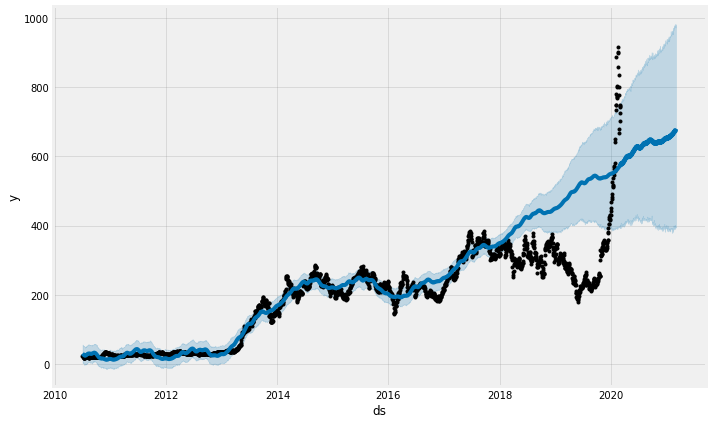

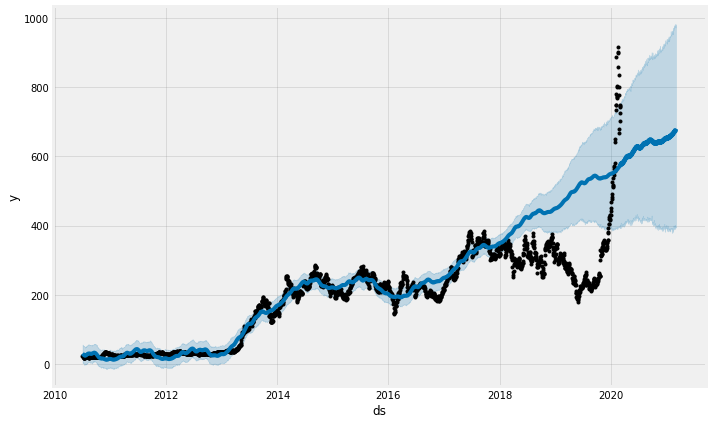

In [413]:
proph_2018_minmax.plot(tsla_forecast_2018_minmax, uncertainty=True)

[[<matplotlib.lines.Line2D at 0x2a20a588e10>],

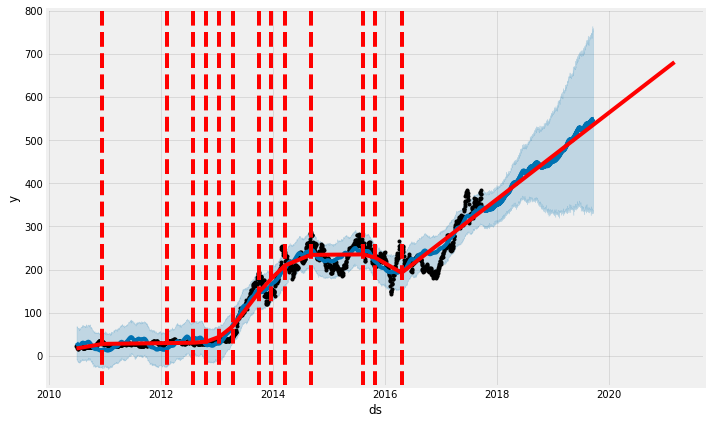

In [429]:
fig_2018 = proph_2018.plot(forecast_2018)
add_changepoints_to_plot(fig_2018.gca(), proph_2018, forecast_2018_minmax)

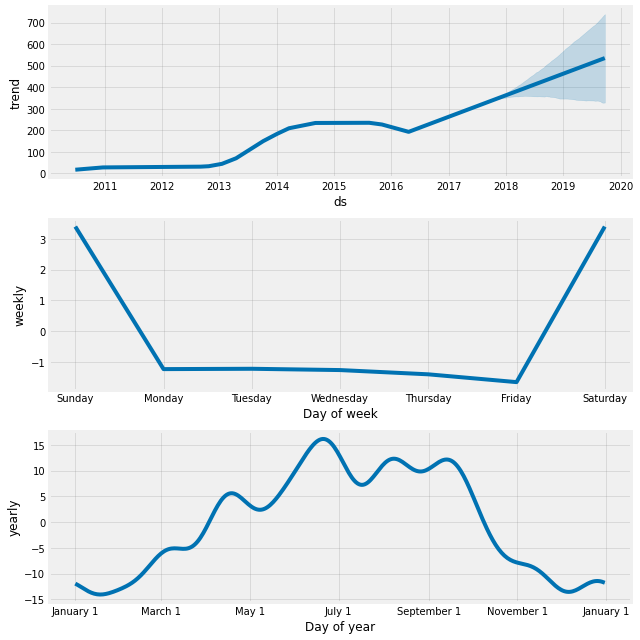

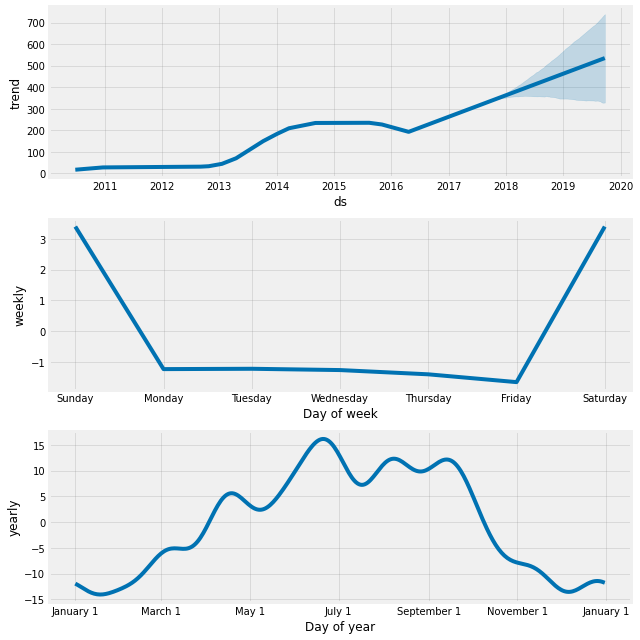

In [430]:
proph_2018.plot_components(forecast_2018)